# Momento de Retroalimentación: Módulo 2 Implementación de una técnica de aprendizaje máquina sin el uso de un framework.
**Elaborado por Marcelo Márquez Murillo - A01720588, para la clase TC3006C.101**

**Dataset**
*Diabetes Healthcare: Comprehensive Dataset*
El Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales (NIDDK), es una institución dedicada a la investigación y desarrollo de tratamientos médicos para enfermedades crónicas. Con el propósito de avanzar en la comprensión y predicción de pacientes propensos a padecer diabetes, han establecido una base de datos que recopila información de salud de diversos pacientes, así como su estado de salud en relación con la diabetes. Esta base de datos se emplea para entrenar un modelo de Aprendizaje Automático (Machine Learning) con el fin de mejorar la precisión de los diagnósticos relacionados con esta enfermedad.

La base de datos contiene la siguiente información por paciente:
* Variables independientes
* Pregnancies - número de veces que la paciente se haya embarazado.
* Glucose - concentración de glucosa en el cuerpo del paciente.
* BloodPressure - Presión arterial del paciente.
* SkinThickness - Grosor del pliegue cutáneo del tríceps.
* Insulin - Suero de insulina.
* BMI - Body Mass Index (Índice de masa corporal).
* DiabetesPedigreeFunction - Función del pedigrí de la diabetes
* Age - Edad del paciente.
* Variable dependiente
* Outcome - Variable de clase binaria, 1 representa que el paciente tiene diabetes y 0 significa que no tiene diabetes.

Link al dataset: https://www.kaggle.com/datasets/deependraverma13/diabetes-healthcare-comprehensive-dataset?datasetId=3546399&sortBy=voteCount  
Este dataset tiene la licencia: *Database Contents License (DbCL) v1.0*


**Modelo utilizado**
Para este análisis, se ha optado por un modelo de regresión logística simple debido a su eficacia reconocida en la predicción de resultados binarios, como es el caso de la variable "Outcome" que estamos analizando, la cual indica la presencia (1) o ausencia (0) de diabetes.

La regresión logística simple se centra en establecer una relación entre una única variable independiente y la variable dependiente. En este caso, hemos seleccionado la variable "Glucose" (concentración de glucosa en el cuerpo del paciente) como nuestra variable independiente debido a su alta correlación con la variable dependiente, lo que sugiere que es un buen predictor para el diagnóstico de la diabetes.

Aunque este enfoque es más simple comparado con la regresión logística múltiple, que involucra múltiples variables independientes, tiene la ventaja de facilitar una interpretación más directa y clara de los efectos de la variable independiente sobre la probabilidad de que ocurra el evento de interés (en este caso, un diagnóstico positivo de diabetes).

Este modelo, por lo tanto, no solo nos permite predecir el "Outcome" con una base estadísticamente significativa, sino que también facilita una comprensión más profunda de cómo la concentración de glucosa en el cuerpo puede estar relacionada con la diabetes, proporcionando una herramienta valiosa para la toma de decisiones médicas basadas en datos.


**Métricas a utilizar**
* Matriz de confusión: Una tabla que muestra las cuatro posibles combinaciones de resultados predichos y reales.
    - Verdaderos Positivos (VP): Casos positivos correctamente identificados por el modelo.
    - Falsos Positivos (FP): Casos negativos incorrectamente identificados como positivos.
    - Verdaderos Negativos (VN): Casos negativos correctamente identificados por el modelo.
    - Falsos Negativos (FN): Casos positivos incorrectamente identificados como negativos.
* Exactitud (*Accuracy*): Indica el porcentaje de predicciones correctas del total de predicciones.
* Precisión (*Precision*): De todas las predicciones positivas que realizó el modelo, muestra el porcentaje que fueron correctas.
* Sensibilidad (*Recall*): De todos los casos positivos reales, muestra el porcentaje que el modelo logró identificar correctamente.
* Puntaje F1 (*F1 Score*): Es el promedio armónico entre la precisión y la sensibilidad, ofreciendo un balance entre ambas métricas.

Cada una de estas métricas ofrece una perspectiva diferente sobre el rendimiento del modelo, y juntas brindan una visión comprensiva de cómo está funcionando el modelo en diferentes aspectos. Es importante considerar todas estas métricas para obtener una comprensión completa del rendimiento del modelo.

In [37]:
# Importamos las librerías
import pandas as pd
import seaborn as sns
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
%matplotlib inline

## Cargamos los datos

In [38]:
df = pd.read_csv("health_care_diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Modificamos los datos

In [39]:
# Utilizamos la media sin ceros en los valores faltantes de las columnas especificadas
mean_glucose = df[df["Glucose"] != 0]["Glucose"].mean().round(2)
df["Glucose"].replace(0, mean_glucose, inplace=True)
mean_blood_pressure = df[df["BloodPressure"] != 0]["BloodPressure"].mean().round(2)
df["BloodPressure"].replace(0, mean_blood_pressure, inplace=True)
mean_skin_thickness = df[df["SkinThickness"] != 0]["SkinThickness"].mean().round(2)
df["SkinThickness"].replace(0, mean_skin_thickness, inplace=True)
mean_insulin = df[df["Insulin"] != 0]["Insulin"].mean().round(2)
df["Insulin"].replace(0, mean_insulin, inplace=True)
mean_bmi = df[df["BMI"] != 0]["BMI"].mean().round(2)
df["BMI"].replace(0, mean_bmi, inplace=True)

In [40]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686784,72.405404,29.152409,155.549089,32.457500,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.205000,29.150000,155.550000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.550000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Creamos una matriz de correlación para conseguir la mejor variable independiente.

<Axes: >

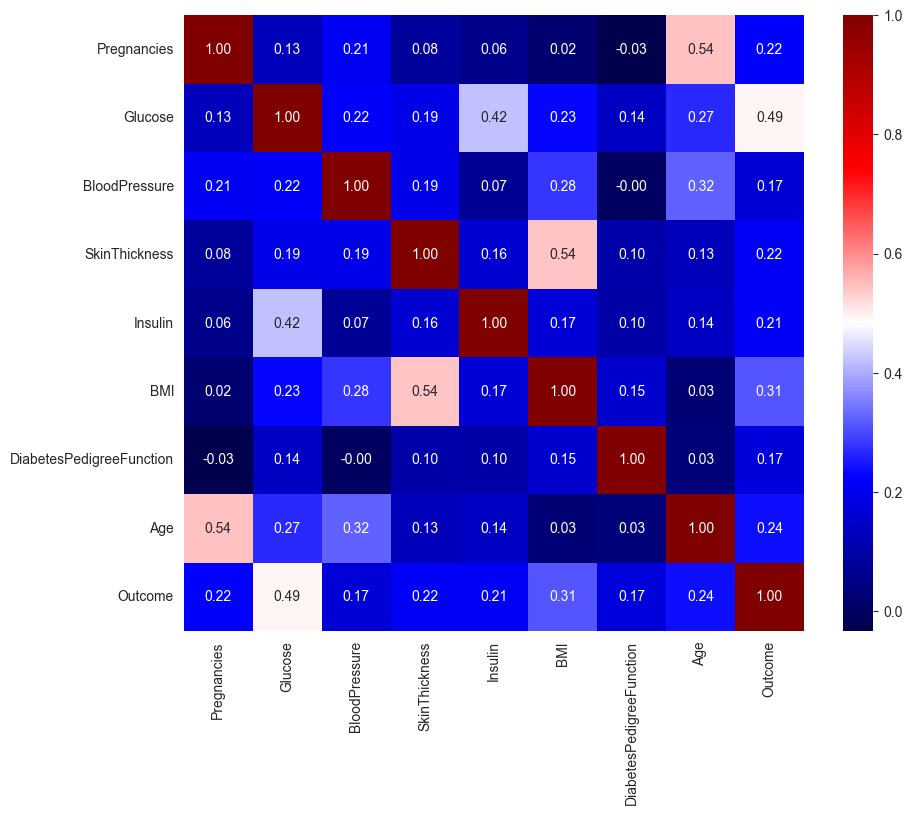

In [41]:
corr = df.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='seismic', fmt=".2f", ax=ax)

**Podemos ver que la correlación más grande con "Outcome" es "Glucose" (glucosa):**

In [42]:
# Revisamos el balance de clases de la variable dependiente
print(f"1: {(df['Outcome'] == 1).sum()}")
print(f"0: {(df['Outcome'] == 0).sum()}")

1: 268
0: 500


## Separamos los datos y agregamos datos sintéticos (por medio de SMOTE) para mejorar el entrenamiento

In [43]:
# Variable independiente
X = df.drop("Outcome", axis=1)
# Variable dependiente
y = df["Outcome"]

# Dividimos el dataset por entrenamiento y prueba (60% y 40% respectivamente)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

X_train = X_train['Glucose']
X_test = X_test['Glucose']

# Empezar con theta0 y theta1 en 1
theta = [-13.5, 6.5]
# Agregar el learning rate
alpha = 0.001

### Función de hipótesis

$h_θ(x) = \frac{1}{1 + e^{-(θ_0 + θ_1x)}}$

In [44]:
# Lambda de función de hipótesis
h = lambda theta, x: 1 / (1 + np.exp(-(theta[0] + theta[1] * x)))
# Longitud de variable independiente (chd)
n1 = len(X_train)
n2 = len(X_test)

In [45]:
# Número de iteraciones
iterations = 6000

### En cada iteración necesitamos conseguir los valores de theta actualizados:

$\theta_0=\theta_0-\alpha \frac{1}{n}\sum_{i=1}^{n}(h_θ(x_i)-y_i)$:

$\theta_1=\theta_1-\alpha \frac{1}{n}\sum_{i=1}^{n}(h_θ(x_i)-y_i)x_i$

In [46]:
# Entrenamos el modelo
for _ in range(n1):
    delta0 = []
    delta1 = []
    
    # Barrer muestras
    for xi, yi in zip(X_train, y_train):
        # Crear la predicción
        prediction = h(theta=theta, x=xi)
        # Calcular el delta para theta0 y agregar a la lista
        delta0.append(prediction - yi)
        # Calcular el delta para theta1 y agregar a la lista
        delta1.append((prediction - yi) * xi)
    
    # Calcular sumatorias y promedio
    dJd0 = (1 / n1) * sum(delta0)
    dJd1 = (1 / n1) * sum(delta1)
    
    # Actualizar theta0
    theta[0] = theta[0] - alpha * dJd0
    # Actualizar theta1
    theta[1] = theta[1] - alpha * dJd1

print("Latest theta values")
print(f"theta0: {theta[0]}")
print(f"theta1: {theta[1]}")

Latest theta values
theta0: -13.54156328839028
theta1: 0.10765185464046326


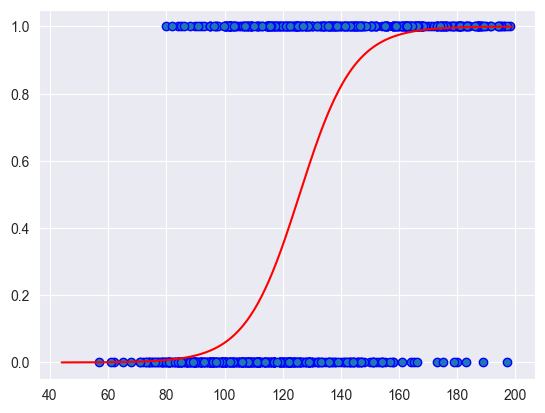

In [47]:
# Crear valores de valor mínimo a valor máximo para "x"
x_values = np.linspace(df["Glucose"].min(), df["Glucose"].max(), df["Glucose"].count())
# Conseguir todas las predicciones de "y" con theta y "x"
y_values = [h(theta=theta, x=x) for x in x_values]

# Utilizar gráfica "scatter plot" para todos los valores de los datos (score y passed)
plt.scatter(x=X_train, y=y_train, edgecolors='blue')
# Crear la gráfica de la regresión logística con los valores x_values y y_values
plt.plot(x_values, y_values, color='red', label='Logistic Regression Line')
# Mostrar la gráfica
plt.show()

En la gráfica se representa una curva sigmoide, la cual se encuentra limitada dentro del rango de cero a uno. Observamos que en el intervalo de 40 a 90, la curva permanece en cercanías de cero, y a partir del punto 91, comienza a ascender gradualmente. Además, notamos que alrededor del valor 160, la curva alcanza y mantiene un valor de uno hasta aproximadamente x = 200. Es relevante destacar que los datos que se encuentran entre los valores 90 y 160 muestran una transición gradual de cero a uno. Sin embargo, cuando aplicamos nuestra función de predicción y redondeamos estos valores, estos retornan a los extremos de cero y uno. 


## Evaluación y predicciones

# Hacemos uso de los datos de prueba (X_test, y_test) para conseguir sus predicciones

In [48]:
# Inicializar acumuladores
predictions = []
# Barrer la entrada y estimar las salidas:
for i in range(n2):
    # Usar función de hipótesis
    predictions_temp = h(theta=theta, x=X_test.iloc[i])
    # Redondear la predicción
    predictions_temp = round(predictions_temp)
    # Agregar a la lista
    predictions.append(predictions_temp)

print(predictions)

[1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0]


### Matriz de confusión

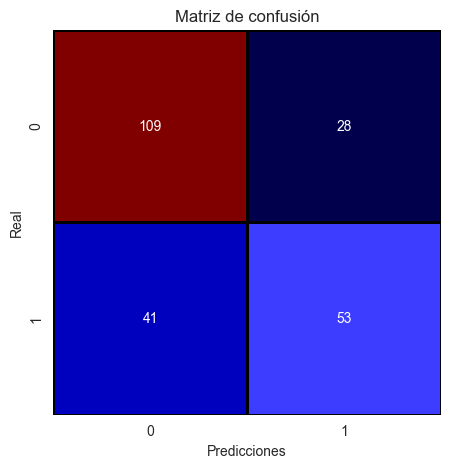

In [49]:
VP = 0
VN = 0
FP = 0
FN = 0

for i in range(len(X_test)):
    # Analizar opciones para dato real == 1
    if y_test.iloc[i] == 1:
        if predictions[i] == 1:
            VP += 1
        else:
            FP += 1
    else:
        if predictions[i] == 0:
            VN += 1
        else:
            FN += 1

conf_matrix = pd.DataFrame({
    '0': [VN, FN],
    '1': [FP, VP]
}, index=['0', '1'])

plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='seismic', cbar=False, linewidths=1, linecolor='black', annot_kws={"color": 'white'})

plt.xlabel('Predicciones')
plt.ylabel('Real')
plt.title('Matriz de confusión')
plt.show()

### Métricas

In [50]:
# Finalmente calculamos las métricas
def calculate_metrics(vp, vn, fp, fn):
    a = (vp + vn) / (vp + vn + fp + fn)
    p = vp / (vp + fp)
    r = vp / (vp + fn)
    f1 = (2 * p * r) / (p + r)
    
    print(f"Accuracy - {a}")
    print(f"Precision - {p}")
    print(f"Recall - {r}")
    print(f"F1 Score - {f1}")

calculate_metrics(vp=VP, vn=VN, fp=FP, fn=FN)

Accuracy - 0.7012987012987013
Precision - 0.654320987654321
Recall - 0.5638297872340425
F1 Score - 0.6057142857142858


El modelo de regresión logística simple muestra un rendimiento moderado con una precisión del 70.13%. Aunque más de dos tercios de las predicciones son correctas, la sensibilidad del modelo es baja (56.38%), lo que indica que no identifica una considerable cantidad de casos positivos reales. El puntaje F1, que se encuentra en 60.57%, señala que hay un equilibrio moderado entre la precisión y la sensibilidad, pero aun con margen para mejorar.

Para optimizar el modelo, se podrían explorar estrategias como la inclusión de más variables, afinación de hiperparámetros o probar con diferentes algoritmos de aprendizaje automático.

## Corremos algunas predicciones

In [63]:
# Para conseguir estas predicciones, utilizaremos la función aleatoria, conseguiremos 5 datos a predecir
indices = rnd.sample(range(len(X_test)), 5)

X_selected = X_test.iloc[indices]
y_selected = y_test.iloc[indices]

# Inicializar acumuladores
selected_predictions = []
# Barrer la entrada y estimar las salidas:
for i in range(len(X_selected)):
    # Usar función de hipótesis
    predictions_temp = h(theta=theta, x=X_selected.iloc[i])
    # Redondear la predicción
    predictions_temp = round(predictions_temp)
    # Agregar a la lista
    selected_predictions.append(predictions_temp)

print(selected_predictions)

df_res = pd.DataFrame({
    'Glucosa': X_selected,
    'Predicciones': selected_predictions,
    'Reales': y_selected
})

df_res

[1, 1, 0, 0, 1]


,Glucosa,Predicciones,Reales
397,131.0,1,1
484,145.0,1,1
554,84.0,0,0
734,105.0,0,0
661,199.0,1,1
